In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import seaborn as sns
from datetime import datetime

In [3]:
yield_thai = pd.read_csv("yield_dist_clean_mainSeason.csv")
districts = gpd.read_file("thailand_districts.geojson")

In [4]:
yield_thai

,Unnamed: 0,admin2Pcode,year,district,area_planted_rai,area_harvested_rai,production_ton,yield_planted_kg_rai,yield_harvest_kg_rai
0,0,TH1003,2012,หนองจอก,66777,66521,45101,675,678
1,1,TH1003,2013,หนองจอก,66490,66174,44800,674,677
2,2,TH1003,2014,หนองจอก,59422,59395,39438,664,664
3,3,TH1003,2015,หนองจอก,51256,49434,33467,653,677
4,4,TH1003,2016,หนองจอก,53404,52884,34903,654,660
...,...,...,...,...,...,...,...,...,...
6565,6565,TH9613,2014,เจาะไอร้อง,2549,2538,964,378,380
6566,6566,TH9613,2015,เจาะไอร้อง,1624,1624,641,395,395
6567,6567,TH9613,2016,เจาะไอร้อง,2380,2193,853,358,389
6568,6568,TH9613,2017,เจาะไอร้อง,2275,2267,907,399,400


In [5]:
districts

,OBJECTID,admin2Name_en,admin2Name_th,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin2AltName1_th,admin2AltName2_th,admin1Name_en,...,admin1Pcode,admin0Name_en,admin0Name_th,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area,geometry
0,1,Phra Nakhon,พระนคร,TH1001,NaN,NaN,NaN,NaN,NaN,Bangkok,...,TH10,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.085417,0.000450,"MULTIPOLYGON (((100.50075 13.74107, 100.49981 ..."
1,2,Dusit,ดุสิต,TH1002,NaN,NaN,NaN,NaN,NaN,Bangkok,...,TH10,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.134132,0.000950,"MULTIPOLYGON (((100.52000 13.80000, 100.52074 ..."
2,3,Nong Chok,หนองจอก,TH1003,NaN,NaN,NaN,NaN,NaN,Bangkok,...,TH10,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.676342,0.019859,"MULTIPOLYGON (((100.91398 13.94621, 100.91395 ..."
3,4,Bang Rak,บางรัก,TH1004,NaN,NaN,NaN,NaN,NaN,Bangkok,...,TH10,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.085886,0.000337,"MULTIPOLYGON (((100.51703 13.71808, 100.51703 ..."
4,5,Bang Khen,บางเขน,TH1005,NaN,NaN,NaN,NaN,NaN,Bangkok,...,TH10,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.301722,0.003415,"MULTIPOLYGON (((100.60999 13.89078, 100.60997 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,924,Sukhirin,สุคิริน,TH9609,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,TH96,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,1.288659,0.042957,"MULTIPOLYGON (((101.79932 6.08755, 101.80112 6..."
924,925,Su-Ngai Kolok,สุไหงโก-ลก,TH9610,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,TH96,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.551915,0.010903,"MULTIPOLYGON (((102.04029 6.14575, 102.04042 6..."
925,926,Su-Ngai Padi,สุไหงปาดี,TH9611,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,TH96,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,0.982590,0.031559,"MULTIPOLYGON (((101.91713 6.27785, 101.91723 6..."
926,927,Chanae,จะแนะ,TH9612,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,TH96,Thailand,ประเทศไทย,TH,2019-02-18 00:00:00+00:00,2022-01-22 00:00:00+00:00,NaN,1.403064,0.048271,"MULTIPOLYGON (((101.71362 6.18475, 101.71349 6..."


In [6]:
yield_thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6570 non-null   int64 
 1   admin2Pcode           6570 non-null   object
 2   year                  6570 non-null   int64 
 3   district              6570 non-null   object
 4   area_planted_rai      6570 non-null   int64 
 5   area_harvested_rai    6570 non-null   int64 
 6   production_ton        6570 non-null   int64 
 7   yield_planted_kg_rai  6570 non-null   int64 
 8   yield_harvest_kg_rai  6570 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 462.1+ KB


In [7]:
yield_thai.nunique()

Unnamed: 0              6570
admin2Pcode              871
year                       8
district                1002
area_planted_rai        6135
area_harvested_rai      6153
production_ton          5851
yield_planted_kg_rai     633
yield_harvest_kg_rai     551
dtype: int64

In [8]:
districts.nunique()

OBJECTID             928
admin2Name_en        918
admin2Name_th        923
admin2Pcode          928
admin2RefName          0
admin2AltName1_en      0
admin2AltName2_en      0
admin2AltName1_th      0
admin2AltName2_th      0
admin1Name_en         77
admin1Name_th         77
admin1Pcode           77
admin0Name_en          1
admin0Name_th          1
admin0Pcode            1
date                   1
validOn                1
validTo                0
Shape_Length         928
Shape_Area           928
geometry             928
dtype: int64

In [9]:
yield_thai.describe()

,Unnamed: 0,year,area_planted_rai,area_harvested_rai,production_ton,yield_planted_kg_rai,yield_harvest_kg_rai
count,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000
mean,3284.500000,2015.504262,71021.457839,66802.919787,30192.717047,443.211872,459.362557
std,1896.739966,2.415961,78579.943839,73647.430988,33914.698095,142.870865,135.135797
min,0.000000,2012.000000,2.000000,2.000000,1.000000,50.000000,166.000000
25%,1642.250000,2013.000000,10869.500000,10540.000000,4819.250000,336.000000,351.000000
50%,3284.500000,2015.000000,46013.000000,43928.500000,19096.000000,390.000000,402.000000
75%,4926.750000,2017.000000,103146.000000,97123.500000,44041.250000,566.000000,577.000000
max,6569.000000,2020.000000,478054.000000,469120.000000,273048.000000,838.000000,838.000000


In [10]:
# Step 3: Merge the data on the 'admin2Pcode' column
merged_df = districts.merge(yield_thai, on='admin2Pcode')

In [11]:
merged_df

,OBJECTID,admin2Name_en,admin2Name_th,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin2AltName1_th,admin2AltName2_th,admin1Name_en,...,Shape_Area,geometry,Unnamed: 0,year,district,area_planted_rai,area_harvested_rai,production_ton,yield_planted_kg_rai,yield_harvest_kg_rai
0,3,Nong Chok,หนองจอก,TH1003,NaN,NaN,NaN,NaN,NaN,Bangkok,...,0.019859,"MULTIPOLYGON (((100.91398 13.94621, 100.91395 ...",0,2012,หนองจอก,66777,66521,45101,675,678
1,3,Nong Chok,หนองจอก,TH1003,NaN,NaN,NaN,NaN,NaN,Bangkok,...,0.019859,"MULTIPOLYGON (((100.91398 13.94621, 100.91395 ...",1,2013,หนองจอก,66490,66174,44800,674,677
2,3,Nong Chok,หนองจอก,TH1003,NaN,NaN,NaN,NaN,NaN,Bangkok,...,0.019859,"MULTIPOLYGON (((100.91398 13.94621, 100.91395 ...",2,2014,หนองจอก,59422,59395,39438,664,664
3,3,Nong Chok,หนองจอก,TH1003,NaN,NaN,NaN,NaN,NaN,Bangkok,...,0.019859,"MULTIPOLYGON (((100.91398 13.94621, 100.91395 ...",3,2015,หนองจอก,51256,49434,33467,653,677
4,3,Nong Chok,หนองจอก,TH1003,NaN,NaN,NaN,NaN,NaN,Bangkok,...,0.019859,"MULTIPOLYGON (((100.91398 13.94621, 100.91395 ...",4,2016,หนองจอก,53404,52884,34903,654,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,928,Cho-Airong,เจาะไอร้อง,TH9613,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,0.015945,"MULTIPOLYGON (((101.85236 6.29831, 101.85390 6...",6565,2014,เจาะไอร้อง,2549,2538,964,378,380
6566,928,Cho-Airong,เจาะไอร้อง,TH9613,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,0.015945,"MULTIPOLYGON (((101.85236 6.29831, 101.85390 6...",6566,2015,เจาะไอร้อง,1624,1624,641,395,395
6567,928,Cho-Airong,เจาะไอร้อง,TH9613,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,0.015945,"MULTIPOLYGON (((101.85236 6.29831, 101.85390 6...",6567,2016,เจาะไอร้อง,2380,2193,853,358,389
6568,928,Cho-Airong,เจาะไอร้อง,TH9613,NaN,NaN,NaN,NaN,NaN,Narathiwat,...,0.015945,"MULTIPOLYGON (((101.85236 6.29831, 101.85390 6...",6568,2017,เจาะไอร้อง,2275,2267,907,399,400


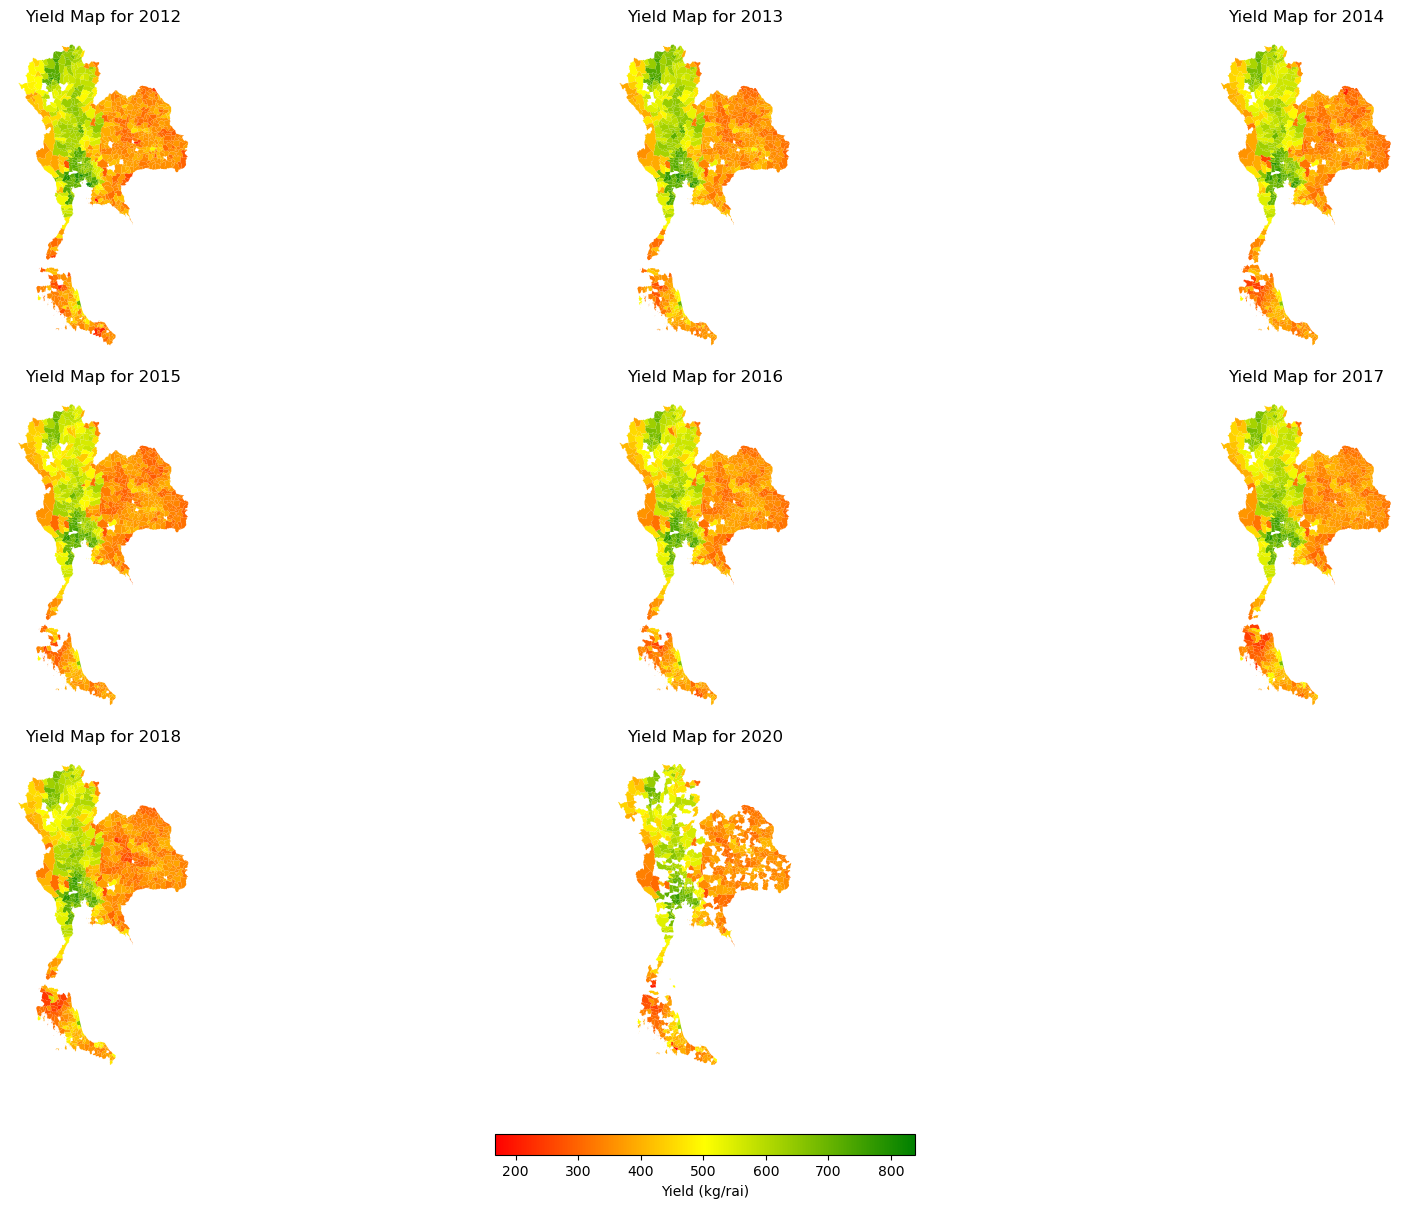

In [12]:
# Assuming 'merged_df' is your merged GeoDataFrame from the full outer join
years = merged_df['year'].unique()  # Get all unique years

# Determine global min and max yield values for consistent coloring
global_min = merged_df['yield_harvest_kg_rai'].min()
global_max = merged_df['yield_harvest_kg_rai'].max()

# Define a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_red_yellow_green", ["red", "yellow", "green"], N=256)
norm = Normalize(vmin=global_min, vmax=global_max)

# Optimize the number of rows and columns for a compact view
n_cols = 3  # Number of columns
n_rows = (len(years) + 2) // n_cols  # Number of rows

# Create the figure with adjusted overall size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, year in enumerate(sorted(years)):
    # Filter data for the specific year
    yearly_data = merged_df[merged_df['year'] == year].dropna(subset=['geometry'])
    
    # Check if the subplot axis should be plotted
    if i < len(axes) and not yearly_data.empty:
        ax = axes[i]
        # Plot with consistent global min and max yield values
        yearly_data.plot(column='yield_harvest_kg_rai', ax=ax, legend=False,
                         cmap=cmap, norm=norm,
                         missing_kwds={'color': 'lightgrey'})
        ax.set_title(f"Yield Map for {year}")
        ax.set_axis_off()
        ax.set_aspect('equal')

# Disable unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Add a single colorbar for all plots
fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.05, label='Yield (kg/rai)')

plt.show()

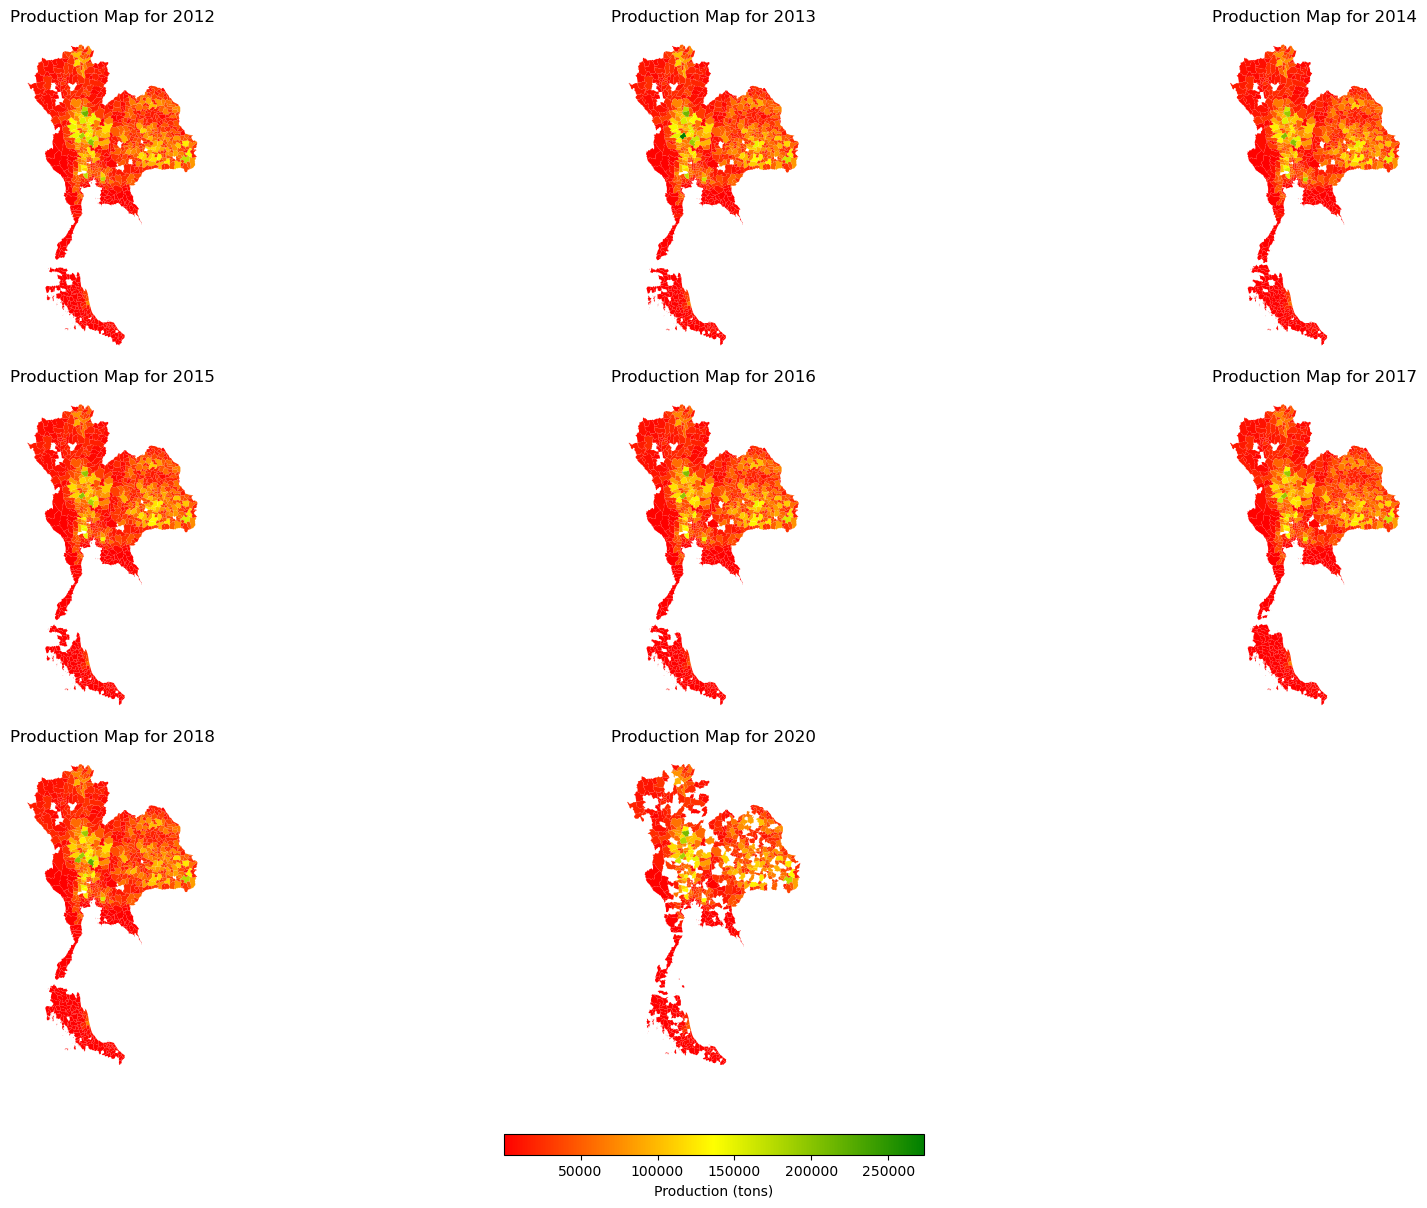

In [13]:
# Assuming 'merged_df' is your merged GeoDataFrame from the full outer join
years = merged_df['year'].unique()  # Get all unique years

# Determine global min and max yield values for consistent coloring
global_min = merged_df['production_ton'].min()
global_max = merged_df['production_ton'].max()

# Define a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_red_yellow_green", ["red", "yellow", "green"], N=256)
norm = Normalize(vmin=global_min, vmax=global_max)

# Optimize the number of rows and columns for a compact view
n_cols = 3  # Number of columns
n_rows = (len(years) + 2) // n_cols  # Number of rows

# Create the figure with adjusted overall size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, year in enumerate(sorted(years)):
    # Filter data for the specific year
    yearly_data = merged_df[merged_df['year'] == year].dropna(subset=['geometry'])
    
    # Check if the subplot axis should be plotted
    if i < len(axes) and not yearly_data.empty:
        ax = axes[i]
        # Plot with consistent global min and max yield values
        yearly_data.plot(column='production_ton', ax=ax, legend=False,
                         cmap=cmap, norm=norm,
                         missing_kwds={'color': 'lightgrey'})
        ax.set_title(f"Production Map for {year}")
        ax.set_axis_off()
        ax.set_aspect('equal')

# Disable unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Add a single colorbar for all plots
fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.05, label='Production (tons)')

plt.show()

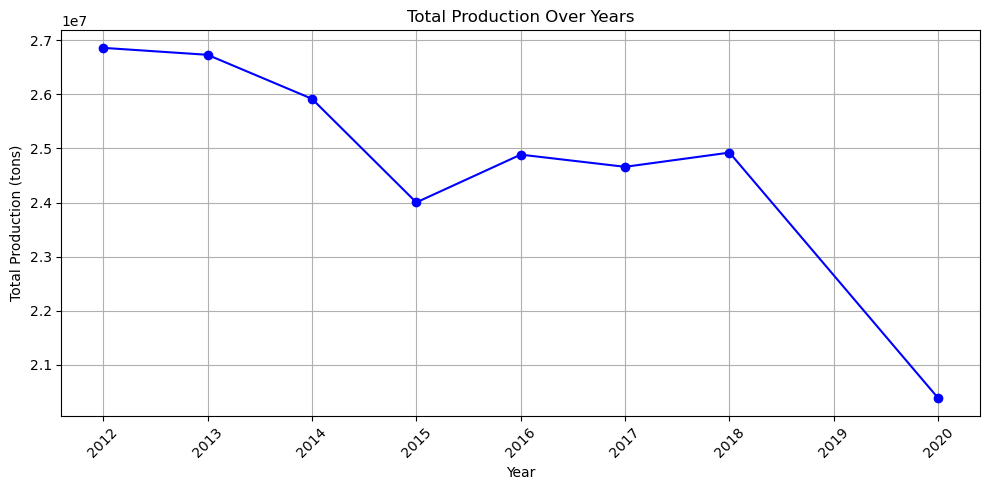

In [14]:
# Assuming 'merged_df' is your DataFrame and it includes 'year' and 'production' columns
# Convert 'year' to datetime if it's not already
yield_thai['year'] = pd.to_datetime(yield_thai['year'], format='%Y').dt.year

# Aggregate production by year if necessary (summing up all production values for each year)
annual_production = yield_thai.groupby(yield_thai['year'])['production_ton'].sum()

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(annual_production.index, annual_production, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('Total Production Over Years')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Total Production (tons)')  # Y-axis label
plt.grid(True)  # Add gridlines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()  # Display the plot

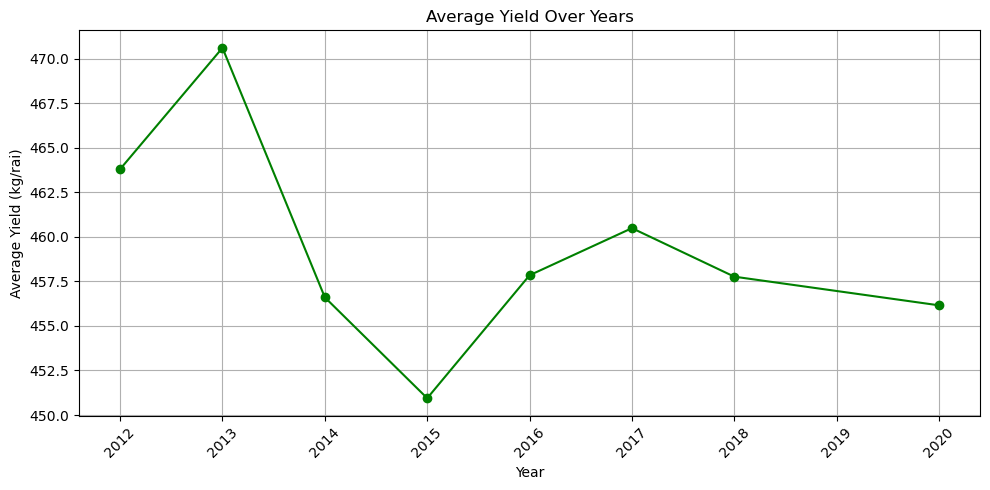

In [15]:
# Aggregate yield by year (calculating the average yield for each year)
average_yield = yield_thai.groupby(yield_thai['year'])['yield_harvest_kg_rai'].mean()

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(average_yield.index, average_yield, marker='o', linestyle='-', color='g')  # Line plot with markers
plt.title('Average Yield Over Years')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Average Yield (kg/rai)')  # Y-axis label
plt.grid(True)  # Add gridlines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()  # Display the plot

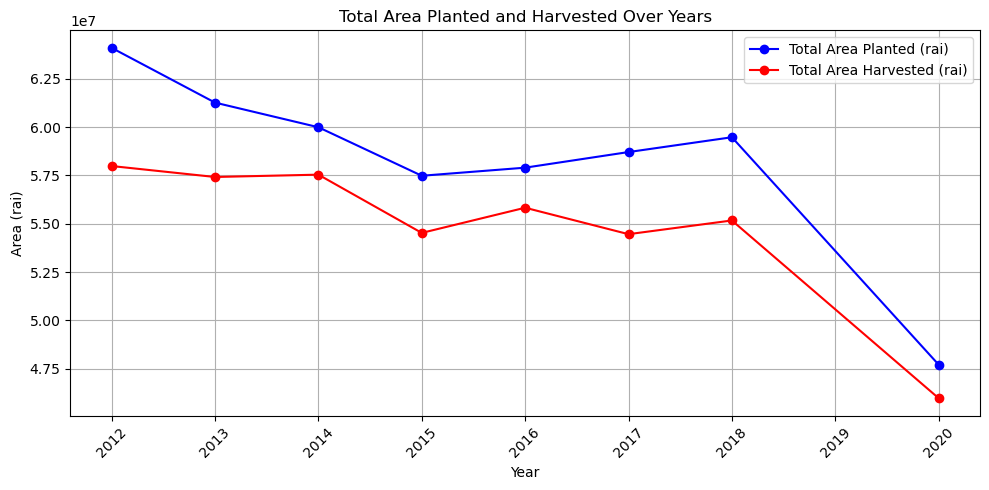

In [16]:
# Aggregate area planted and harvested by year
total_area_planted = yield_thai.groupby(yield_thai['year'])['area_planted_rai'].sum()
total_area_harvested = yield_thai.groupby(yield_thai['year'])['area_harvested_rai'].sum()

# Create a single plot
plt.figure(figsize=(10, 5))  # Set the figure size for better readability

# Plotting total area planted
plt.plot(total_area_planted.index, total_area_planted, marker='o', linestyle='-', color='blue', label='Total Area Planted (rai)')

# Plotting total area harvested
plt.plot(total_area_harvested.index, total_area_harvested, marker='o', linestyle='-', color='red', label='Total Area Harvested (rai)')

# Adding titles and labels
plt.title('Total Area Planted and Harvested Over Years')
plt.xlabel('Year')
plt.ylabel('Area (rai)')
plt.grid(True)  # Add gridlines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legends to identify lines

# Adjust layout and show plot
plt.tight_layout()
plt.show()

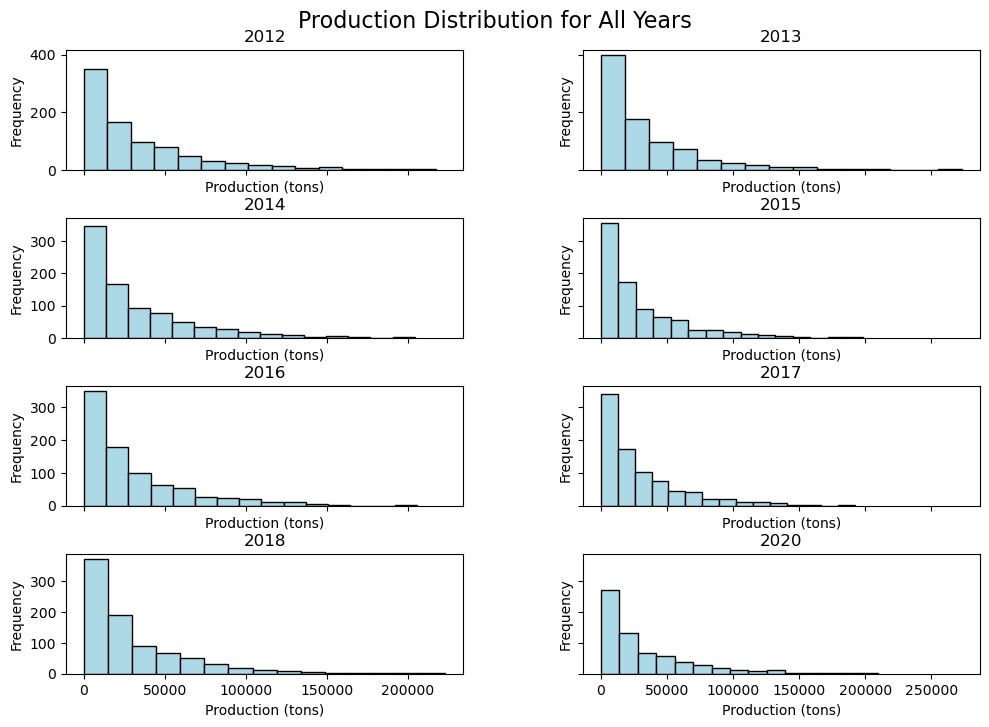

In [17]:
# Get unique years sorted
years = sorted(yield_thai['year'].unique())

# Set up 4 rows and 2 columns for the subplots
n_rows = 4
n_cols = 2

# Create a figure and a grid of subplots with specified figure size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8), sharex='col', sharey='row')

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Plot histogram for each year
for i, year in enumerate(years):
    data = yield_thai[yield_thai['year'] == year]['production_ton']
    axes[i].hist(data, bins=15, color='lightblue', edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Production (tons)')
    axes[i].set_ylabel('Frequency')  # Set y-axis label for each subplot

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Add an overall title to the figure
fig.suptitle('Production Distribution for All Years', fontsize=16, y=0.93)  # Adjust y position to fit above the subplots

# Adjust layout to prevent overlap and ensure tight packing
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.1, hspace=0.4, wspace=0.3)  # Adjust spacing to accommodate titles and labels

plt.show()

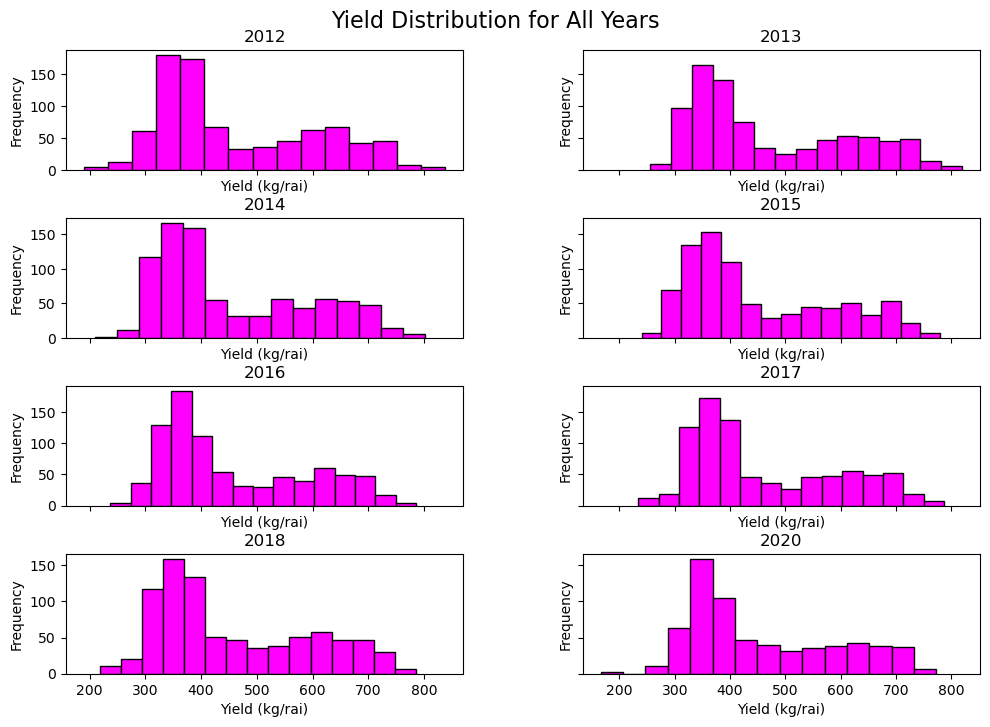

In [18]:
# Get unique years sorted
years = sorted(yield_thai['year'].unique())

# Set up 4 rows and 2 columns for the subplots
n_rows = 4
n_cols = 2

# Create a figure and a grid of subplots with specified figure size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8), sharex='col', sharey='row')

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Plot histogram for each year
for i, year in enumerate(years):
    data = yield_thai[yield_thai['year'] == year]['yield_harvest_kg_rai']
    axes[i].hist(data, bins=15, color='magenta', edgecolor='black')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Yield (kg/rai)')
    axes[i].set_ylabel('Frequency')  # Set y-axis label for each subplot

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Add an overall title to the figure
fig.suptitle('Yield Distribution for All Years', fontsize=16, y=0.93)  # Adjust y position to fit above the subplots

# Adjust layout to prevent overlap and ensure tight packing
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.1, hspace=0.4, wspace=0.3)  # Adjust spacing to accommodate titles and labels

plt.show()

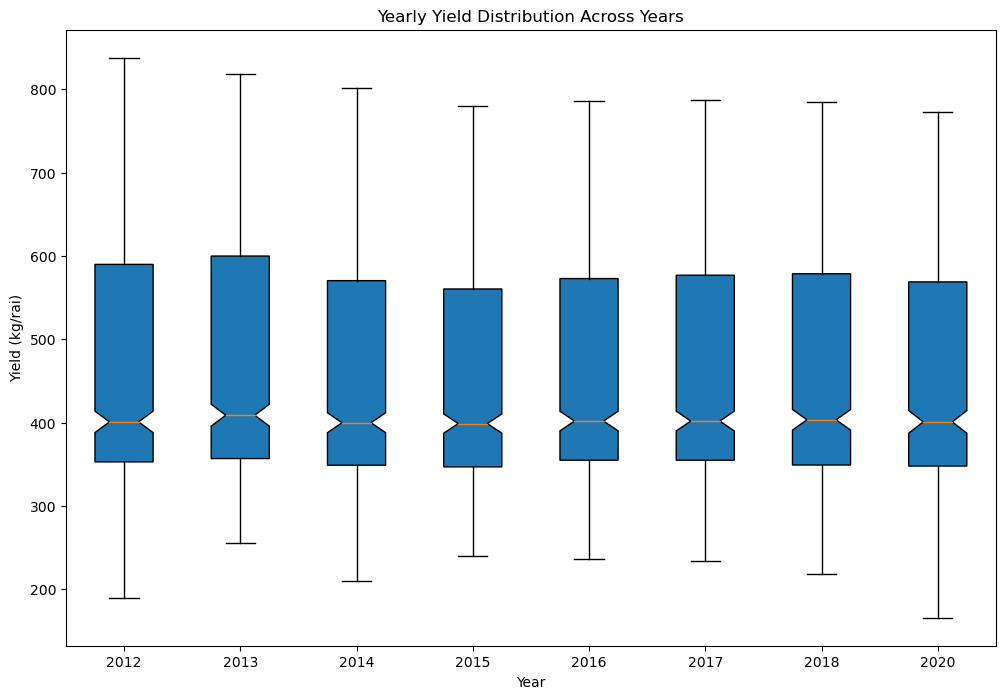

In [19]:
# Prepare the data for plotting
data_to_plot = [yield_thai[yield_thai['year'] == year]['yield_harvest_kg_rai'].dropna() for year in sorted(merged_df['year'].unique())]

# Get unique years sorted for labeling purposes
years = sorted(yield_thai['year'].unique())

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Create the boxplot
ax.boxplot(data_to_plot, notch=True, patch_artist=True)

# Set x-tick labels to years
ax.set_xticklabels(years)
ax.set_title('Yearly Yield Distribution Across Years')
ax.set_xlabel('Year')
ax.set_ylabel('Yield (kg/rai)')

# Show the plot
plt.show()

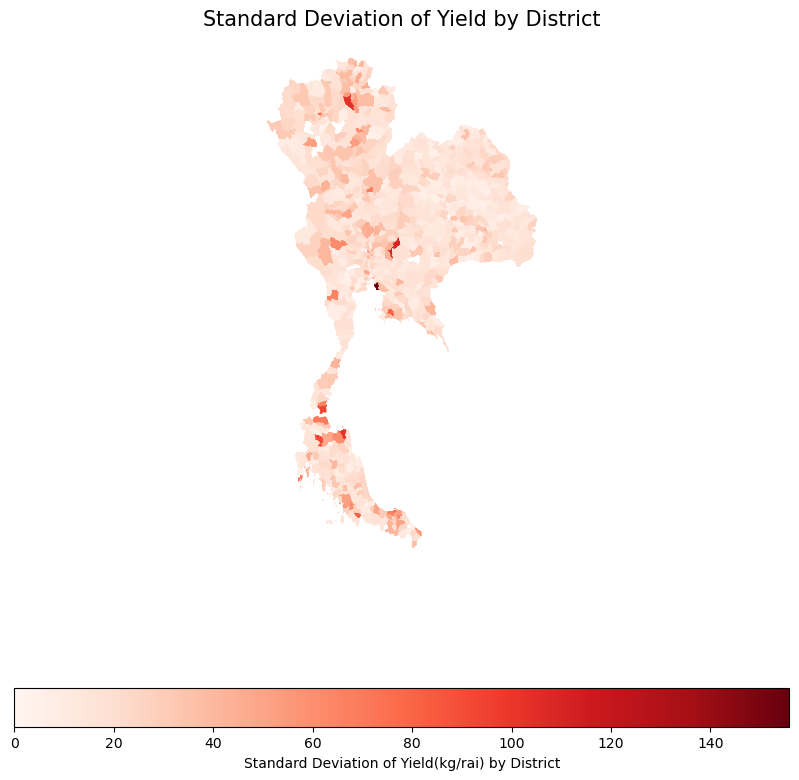

In [20]:
std_dev = merged_df.groupby('admin2Pcode')['yield_harvest_kg_rai'].std().reset_index()
std_dev.columns = ['admin2Pcode', 'yield_std_dev']

# Merge this back into your GeoDataFrame
gdf = merged_df.merge(std_dev, on='admin2Pcode')

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the data
gdf.plot(column='yield_std_dev', ax=ax, legend=True,
         legend_kwds={'label': "Standard Deviation of Yield(kg/rai) by District", 'orientation': "horizontal"},
         cmap='Reds')  # Use a color map that highlights variation well

# Remove the axis
ax.set_axis_off()

# Add a title
ax.set_title('Standard Deviation of Yield by District', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Show the plot
plt.show()

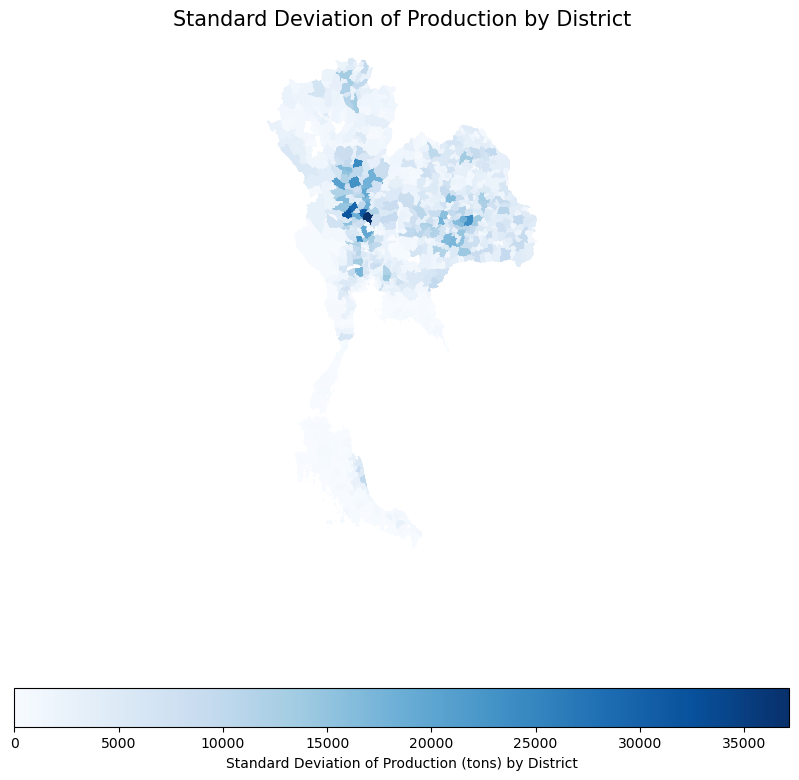

In [21]:
# Calculate standard deviation of production by district
std_dev_prod = merged_df.groupby('admin2Pcode')['production_ton'].std().reset_index()
std_dev_prod.columns = ['admin2Pcode', 'production_std_dev']

# Merge this back into your GeoDataFrame
gdf2 = merged_df.merge(std_dev_prod, on='admin2Pcode')

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the data
gdf2.plot(column='production_std_dev', ax=ax, legend=True,
         legend_kwds={'label': "Standard Deviation of Production (tons) by District", 'orientation': "horizontal"},
         cmap='Blues')  # Using a different color map that is suitable for showing variation in production

# Remove the axis
ax.set_axis_off()

# Add a title
ax.set_title('Standard Deviation of Production by District', fontdict={'fontsize': '15', 'fontweight': '3'})

# Show the plot
plt.show()

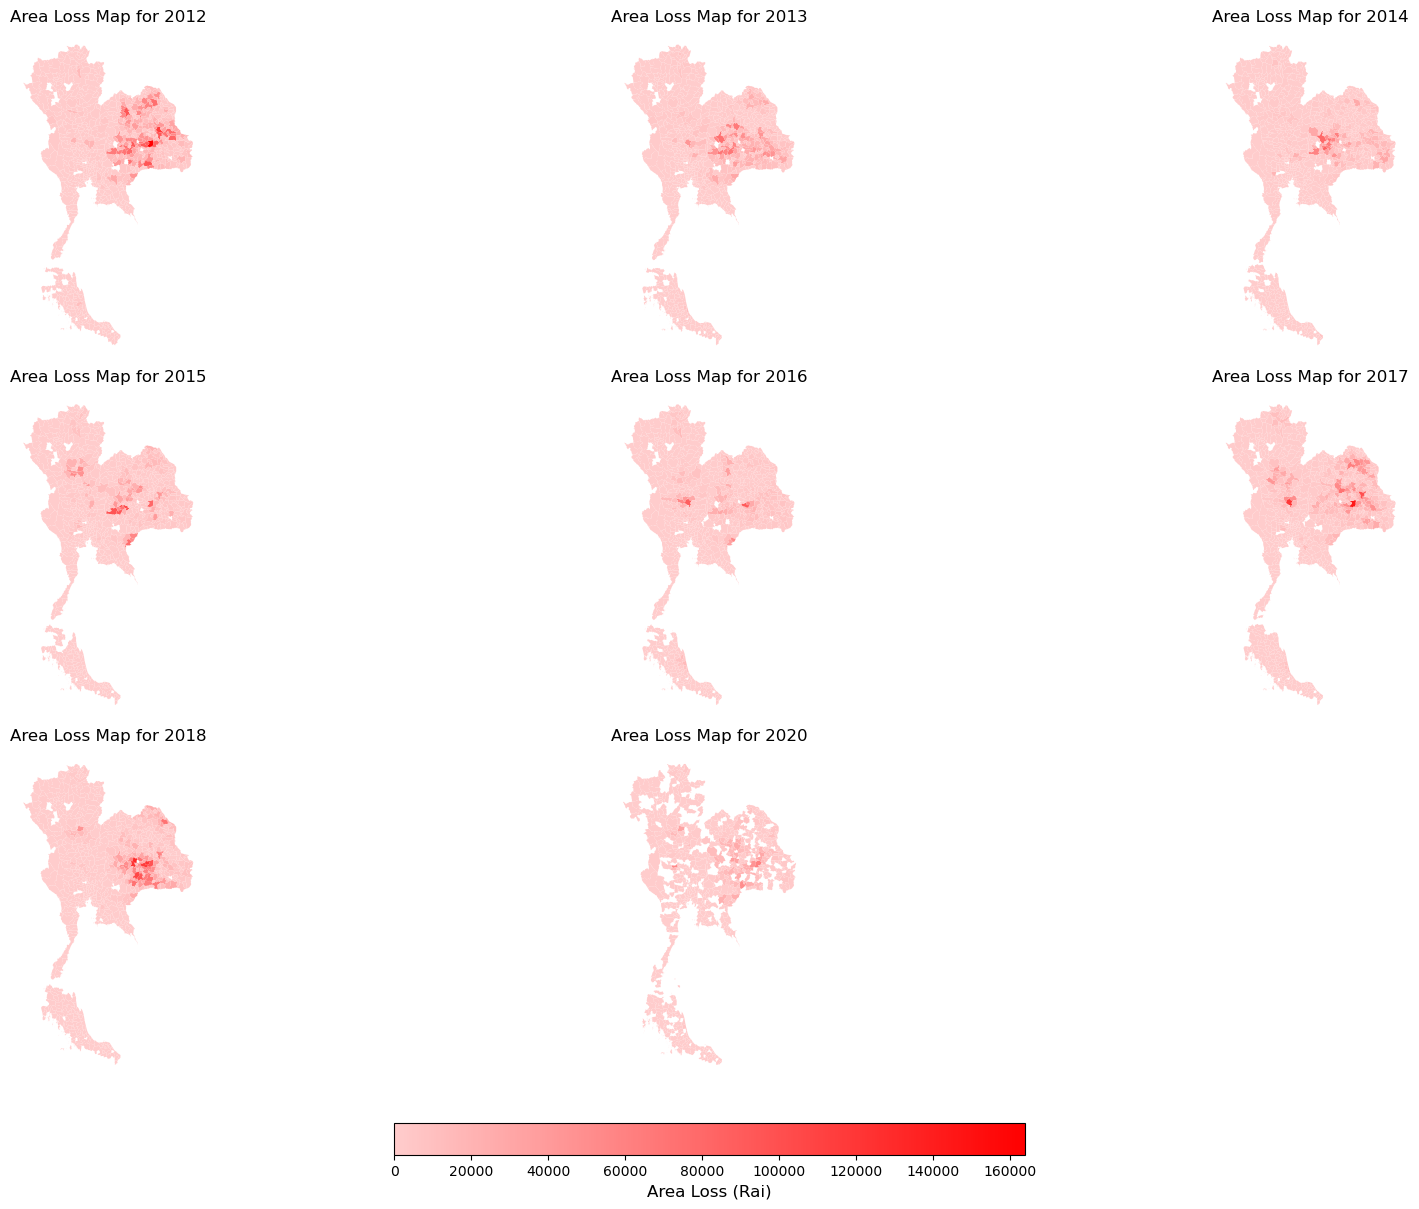

In [32]:
# Assuming 'merged_df' is your GeoDataFrame from the full outer join
merged_df['area_loss'] = merged_df['area_planted_rai'] - merged_df['area_harvested_rai']  # Calculate area loss
years = merged_df['year'].unique()  # Get all unique years

# Determine global min and max area loss values for consistent coloring
global_min = merged_df['area_loss'].min()
global_max = merged_df['area_loss'].max()

# Define a custom colormap from light red to dark red
cmap = LinearSegmentedColormap.from_list("custom_reds", ["#ffcccc", "#ff0000"], N=256)
norm = Normalize(vmin=global_min, vmax=global_max)

# Optimize the number of rows and columns for a compact view
n_cols = 3  # Number of columns
n_rows = (len(years) + 2) // n_cols  # Number of rows

# Create the figure with adjusted overall size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, year in enumerate(sorted(years)):
    # Filter data for the specific year
    yearly_data = merged_df[merged_df['year'] == year].dropna(subset=['geometry'])
    
    # Check if the subplot axis should be plotted
    if i < len(axes) and not yearly_data.empty:
        ax = axes[i]
        # Plot with consistent global min and max values
        yearly_data.plot(column='area_loss', ax=ax, legend=False,
                         cmap=cmap, norm=norm,
                         missing_kwds={'color': 'lightgrey'})
        ax.set_title(f"Area Loss Map for {year}")
        ax.set_axis_off()
        ax.set_aspect('equal')

# Disable unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Add a single colorbar for all plots
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.03, pad=0.04, label='Area Loss (Rai)')
cbar.ax.tick_params(labelsize=10)  # Larger tick labels
cbar.set_label('Area Loss (Rai)', size=12)  # Larger label

plt.show()